In [1]:
# !conda activate n2v
%load_ext autoreload
from noise2gun import *
from compare import *

# Define and Load datasets
Must be ZARRs

## Define

In [2]:
src_path = src = "/n/groups/htem/ESRF_id16a/tomo_ML/ReducedAnglesXray/jlr54_tests/volumes/mCTX_17keV_30nm_512c_first256/mCTX_17keV_30nm_512c_first256.zarr/volumes"
# gt_name = 'raw'
# ds_names = [NOT CYCLEGAN]


## Load

In [3]:
comparator = Compare(src_path, # 'path/to/data.zarr/volumes'
                # gt_name=gt_name, # 'gt_dataset_name'
                # ds_names=ds_names, # ['dataset_1_name', 'dataset_2_name', ...]
                out_path=None,
                batch_size=1,
                metric_list=None,
                vizualize=True,
                make_mask=True
    )

INFO:daisy.datasets:Creating new volumes/compare_mask in /n/groups/htem/ESRF_id16a/tomo_ML/ReducedAnglesXray/jlr54_tests/volumes/mCTX_17keV_30nm_512c_first256/mCTX_17keV_30nm_512c_first256.zarr


                         CAREgun_mCTX30nm_450p_20210907  \
normalized_root_mse                            0.065560   
peak_signal_noise_ratio                       26.526311   
structural_similarity                          0.807498   

                         kernSize3_depth2_450p  \
normalized_root_mse                   0.078349   
peak_signal_noise_ratio              24.978454   
structural_similarity                 0.794406   

                         noise2gun_mCTX30nm_450p_20210824      train  
normalized_root_mse                              0.132241   0.131402  
peak_signal_noise_ratio                         20.431773  20.487039  
structural_similarity                            0.734743   0.727918  


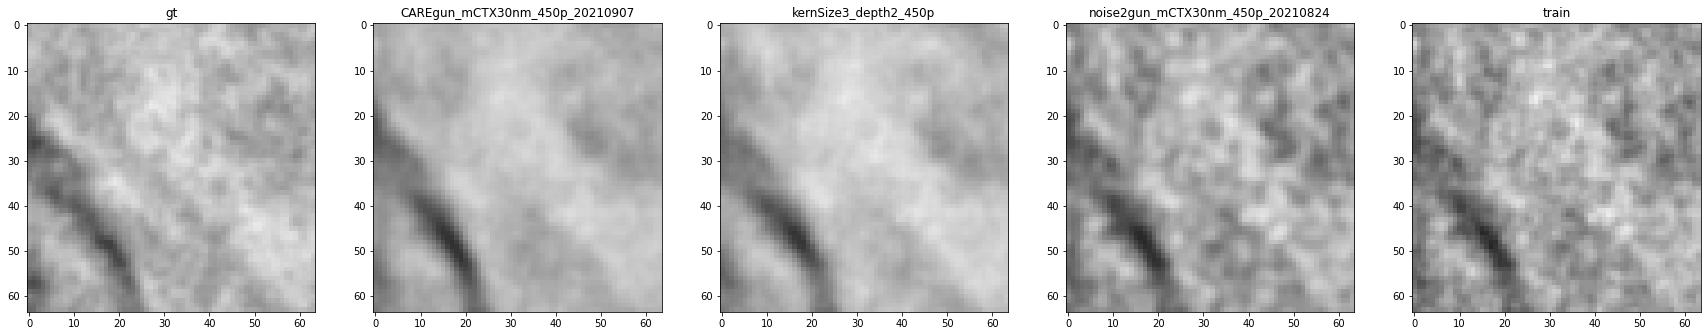

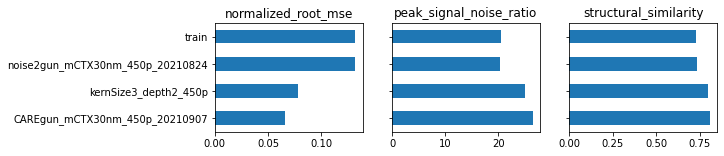

In [20]:
batch = comparator.patch_compare()

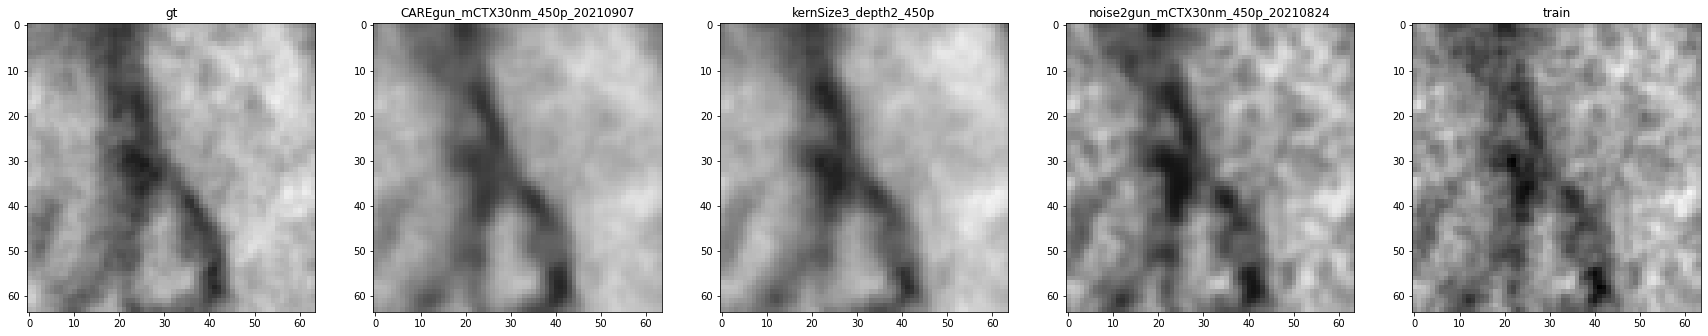

In [9]:
comparator.batch_show()

In [2]:
import zarr
import daisy

In [10]:
n2g = Noise2Gun('', gp.Coordinate((30,30,30)), side_length=34)
pad = (n2g.context_side_length - n2g.side_length) // 2

for array, specs in comparator.source.array_specs.items():
    ds = comparator.source.datasets[array]
    d = daisy.open_ds(src_path.rstrip('/volumes'), 'volumes/'+ds)
    crop = gp.Coordinate(pad * d.voxel_size)
    spec = specs
    roi = gp.Roi(d.roi.get_offset(), d.roi.get_shape())
    spec.roi = roi.grow(-crop, -crop)
    spec.voxel_size = d.voxel_size
    spec.dtype = d.dtype
    comparator.source.array_specs[array] = spec

In [15]:
for array, specs in comparator.source.array_specs.items():
    print(array)
    print(specs.roi)

GT
None
CAREGUN_MCTX30NM_450P_20210907
None
KERNSIZE3_DEPTH2_450P
None
NOISE2GUN_MCTX30NM_450P_20210824
None
TRAIN
None
COMPARE_MASK
None


In [14]:
# comparator.ds_names.append(comparator.mask_name)
comparator.make_pipes()

In [41]:
comparator.source.datasets

{GT: 'gt',
 CAREGUN_MCTX30NM_450P_20210907: 'CAREgun_mCTX30nm_450p_20210907',
 KERNSIZE3_DEPTH2_450P: 'kernSize3_depth2_450p',
 NOISE2GUN_MCTX30NM_450P_20210824: 'noise2gun_mCTX30nm_450p_20210824',
 TRAIN: 'train'}

In [9]:
z = zarr.open(src_path)
z['compare_mask'].info
# z['gt'].info

Name,/compare_mask
Type,zarr.core.Array
Data type,uint8
Shape,"(164, 420, 420)"
Chunk shape,"(41, 105, 210)"
Order,C
Read-only,False
Compressor,Zlib(level=3)
Store type,zarr.storage.DirectoryStore
No. bytes,28929600 (27.6M)
No. bytes stored,127332 (124.3K)
